# Monty Hall Problem

In [1]:
import random
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Function for Revealing a door that doesnt contain the prize and the player's original choice

In [2]:
def get_non_prize_door(host, num_doors, player_choice):
    i=1
    while (i==host or i==player_choice):
        i = (i+1)%(num_doors)

    return i

Function for a Player to switch to the other unopened door

In [3]:
def switch_function(shown_door, num_doors, player_choice):
    i=1
    while (i==shown_door or i==player_choice):
        i = (i+1)%(num_doors)

    return i

Function to Simulate the game

In [4]:
def monty_hall_game(switch, num_tests):
    win_switch_count = 0
    win_no_switch_count = 0
    lose_switch_count = 0
    lose_no_switch_count = 0

    doors = [0,1,2]
    num_doors = len(doors)

    #loop through the number of times the player can play the game
    for i in range(0,num_tests):
        door_with_prize = random.randint(0, num_doors-1) # randomly choose a door between 0 and 2
        host = door_with_prize

        player_choice = random.randint(0, num_doors-1)
        original_player_choice = player_choice

        shown_door = get_non_prize_door(host, num_doors, player_choice)

        # if the player chooses to always switch then allow the player 
        # to switch their original_choice to the other unopened door
        if switch == True:
            player_choice = switch_function(shown_door, num_doors, player_choice)

        if player_choice == door_with_prize and switch == False:
            win_no_switch_count += 1
            # print(f"Player Wins (No Switch) - The player chose door: #{player_choice}, Original door choice: {original_player_choice}, Door with Prize: {door_with_prize}, Shown Door: {shown_door}")

        elif player_choice == door_with_prize and switch == True:
            win_switch_count += 1
            # print(f"Player Wins (Switch) - The player chose door: #{player_choice}, Original door choice: {original_player_choice}, Door with Prize: {door_with_prize}, Shown Door: {shown_door}")

        elif player_choice != door_with_prize and switch == False:
            lose_no_switch_count += 1
            print(f"Player Lost (No Switch) - The player chose door: #{player_choice}, Original door choice: {original_player_choice}, Door with Prize: {door_with_prize}, Shown Door: {shown_door}")

        elif player_choice != door_with_prize and switch == True:
            lose_switch_count += 1
            # print(f"Player Lost (Switch) - The player chose door: #{player_choice}, Original door choice: {original_player_choice}, Door with Prize: {door_with_prize}, Shown Door: {shown_door}")

        else:
            # print("Something went wrong!")
            pass

    return win_no_switch_count, win_switch_count, lose_no_switch_count, lose_switch_count, num_tests

Play the game

In [5]:
x = monty_hall_game(True, 10000)

Get the win/loss % for switching or not switching

In [6]:
print("Win Switch %: ", x[1]/x[4])
print("Lose Switch %: ", x[3]/x[4])
print("Win No Switch %: ", x[0]/x[4])
print("Lose No Switch %: ", x[2]/x[4])

Win Switch %:  0.6654
Lose Switch %:  0.3346
Win No Switch %:  0.0
Lose No Switch %:  0.0


Visualisation of number of simulated games played and the % of wins from always switching

In [7]:
num_tests = []
win_percentage = []
switch = True

for i in range(1,2001):
    num_tests.append(i)
    y = monty_hall_game(switch, i)
    win_percentage.append(y[1]/y[4])

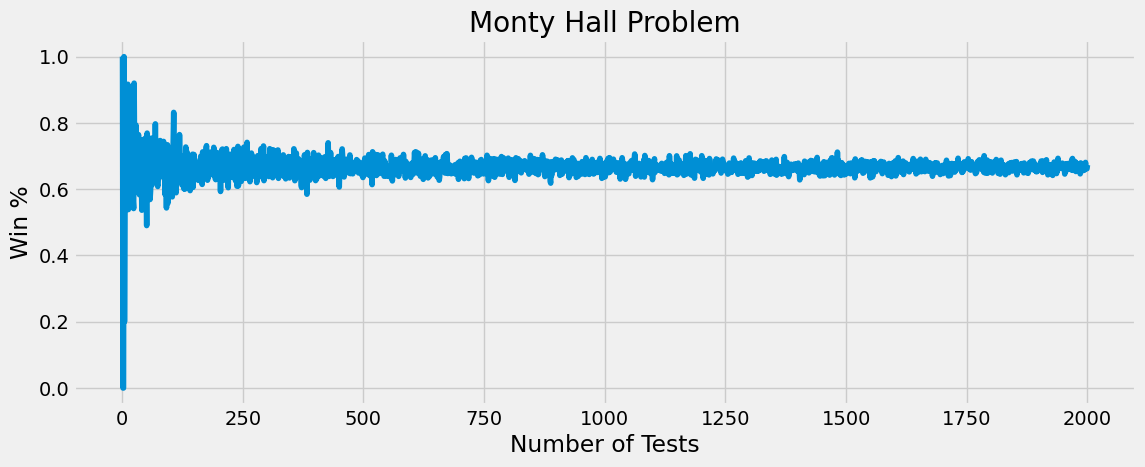

In [8]:
plt.figure(figsize=(12.2,4.5))
plt.plot(num_tests, win_percentage)
plt.title("Monty Hall Problem")
plt.xlabel("Number of Tests")
plt.ylabel("Win %")
plt.show()

In [11]:
print(f"Win % : {y[1]/y[4]} for {y[4]} games.")

Win % : 0.673 for 2000 games.
